# Data Analysis with Pandas — Day 1
## Exploratory Data Analysis

This is the Day 1 notebook for the June 2021 course "Data Analysis with Pandas," part of the [Text Analysis Pedagogy Institute](https://nkelber.github.io/tapi2021/book/intro.html).

In this lesson, we're going to introduce the basics of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We will cover:

* The Essential Structures of Pandas
* How to Load Data
* How to Explore and Filter Data
* How to Make Simple Plots

___

## Dataset
### Seattle Public Library Book Circulation Data

This week, we will be working with [circulation data](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6) made publicly avilable by the Seattle Public Library. The dataset includes items that were checked out 20+ times in a month between January 2015 and June 2021.

For more information about this dataset, see the Seattle Public Library's [data portal](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6).
___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

The above `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`.

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [8]:
pd.options.display.max_colwidth = 100

## How to Load Data

| File Type | Pandas Method  |             
|----------|---------| 
| CSV file    | `pd.read(filepath, delimiter=',')` |
| TSV file    | `pd.read(filepath, delimiter='\t')` |
|  Excel file     | `pd.read_excel(filepath)` |    
|  JSON file     | `pd.read_json(filepath)`, `pd.json_normalize(filepath)` |    
|  SQL table     | `pd.read_sql_table(table_name)` |    

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path, along with a delimiter (the character that separates columns in our file) and a character encoding. 

In [9]:
pd.read_csv('Seattle-Library_2015-2021.csv', delimiter=",", encoding="utf-8")

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — often abbreviated as *df*, e.g., *seattle_df*.

## How to Display Data

We can display a Pandas DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

In [10]:
seattle_df = pd.read_csv('Seattle-Library_2015-2021.csv', delimiter=",", encoding="utf-8")

In [11]:
seattle_df

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


We can examine the first *n* number of rows by using `df.head(n)`.

In [12]:
seattle_df.head(5)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive


Sometimes we want to see data beyond the first few rows. To display a random number of rows, we can use `df.sample()`.

In [13]:
seattle_df.sample(5)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
234921,"Catch and kill : lies, spies, and a conspiracy to protect predators / Ronan Farrow.","Farrow, Ronan, 1987-",BOOK,138,2019,12,"Little, Brown and Company,",2019,"Sexual harassment of women, Sex discrimination in employment, Weinstein Harvey 1952, Motion pict...",Physical,Horizon
42739,Black messiah [sound recording] / D'Angelo and the Vanguard.,"D'Angelo, 1974-",SOUNDDISC,21,2015,8,"RCA,",[2014],"Popular music 2011 2020, Funk Music",Physical,Horizon
192812,"Amulet. Book six, Escape from Lucien / Kazu Kibuishi.","Kibuishi, Kazu, 1978-",BOOK,52,2019,1,"Graphix,",2014,"Supernatural Comic books strips etc, Brothers and sisters Comic books strips etc, Amulets Comic ...",Physical,Horizon
238051,Legacy / Shannon Messenger.,"Messenger, Shannon",BOOK,26,2020,1,"Aladdin,",2019,"Ability Juvenile fiction, Psychic ability Juvenile fiction, Memory Juvenile fiction, Elves Juven...",Physical,Horizon
238976,"The Time of Contempt: The Witcher Saga, Book 2 (unabridged) (Unabridged)",Andrzej Sapkowski,AUDIOBOOK,48,2020,1,"Blackstone Audio, Inc.",2015,"Fantasy, Fiction, Historical Fiction, Thriller",Digital,OverDrive


Go ahead and run it a few times to check out random rows!

## Exploratory Data Analysis — Overview

Ok so what's actually in this Seattle Public Library dataset? What categories are included? What time period(s) does it cover? Is there missing data? Is there messy data?

We can check to see how many rows vs columns are included in the DataFrame by getting the attribute `.shape`.

In [14]:
seattle_df.shape

(282287, 11)

To get important information about all the columns in a DataFrame, we can use `df.info()`.

In [15]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282287 entries, 0 to 282286
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Title            282287 non-null  object
 1   Creator          198035 non-null  object
 2   MaterialType     282287 non-null  object
 3   Checkouts        282287 non-null  int64 
 4   CheckoutYear     282287 non-null  int64 
 5   CheckoutMonth    282287 non-null  int64 
 6   Publisher        275672 non-null  object
 7   PublicationYear  274514 non-null  object
 8   Subjects         274895 non-null  object
 9   UsageClass       282287 non-null  object
 10  CheckoutType     282287 non-null  object
dtypes: int64(3), object(8)
memory usage: 23.7+ MB


<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title"><b/>Python Review 🐍 </b></p>


| **Python Data Type** |  **Example** |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| string  |   "Exhalation / Ted Chiang."; "2020"                                                                         |
| float       |  20.2 |                                      |
| integer |     20 |                                                |
| boolean |     True/False |                                                |
</div>

Python has different data types, which we can check with the built-in `type()` function.

In [16]:
type(2020)

int

In [17]:
type("2020")

str

Similarly, Pandas has different data types, too.

These data types are automatically assigned to columns when we read in a file.



| **Pandas Data Type** |  **Explanation**         | **Example** |
|:-------------:|:---------------------------------------------------------------------------------------------------:|---|
| `object`         | strings, `NaN`   |   "Exhalation / Ted Chiang."; `NaN`; "2020"                                                                         |
| `float64`         | floats       |  20.2 |                                      |
| `int64`       | integers |       20 |                                                |
| `datetime64`       |  datetimes |   `2021-02-01`       

We can check these Pandas data types explicitly with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).

In [18]:
seattle_df.dtypes

Title              object
Creator            object
MaterialType       object
Checkouts           int64
CheckoutYear        int64
CheckoutMonth       int64
Publisher          object
PublicationYear    object
Subjects           object
UsageClass         object
CheckoutType       object
dtype: object

To calculate summary statistics for every column in our DataFrame, we can use the `.describe()` method.

By default, `describe()` will only work on numerical columns, but we can ask it to describe all columns with `include='all'`

In [19]:
seattle_df.describe(include='all')

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
count,282287,198035,282287,282287.000000,282287.000000,282287.000000,275672,274514,274895,282287,282287
unique,31864,9125,23,NaN,NaN,NaN,3597,608,21992,2,5
top,Being mortal : medicine and what matters in the end / Atul Gawande.,"Willems, Mo",BOOK,NaN,NaN,NaN,"Random House, Inc.",[2015],"Fiction, Literature",Physical,Horizon
freq,95,3010,102076,NaN,NaN,NaN,18920,19447,10302,184181,184181
mean,NaN,NaN,NaN,44.759716,2017.541445,6.295363,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,52.047267,1.774746,3.499083,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,20.000000,2015.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,23.000000,2016.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,30.000000,2017.000000,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,45.000000,2019.000000,9.000000,NaN,NaN,NaN,NaN,NaN


`NaN` is the Pandas value for any missing data. We'll cover this in more detail later (you can read ["Working with missing data"](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan) for more information if you're curious now). The `NaN` values in this table indicate that there is no applicable result for the column, e.g., there's no mean or standard deviation for the "title" of items.

- What is the maximum number of checkouts per month?
- What is the minimum number of checkouts per month?
- How many different material types are there?
- Which columns have missing data, and how much data is missing?

**Moment of Reflection** 🛑   

What questions might we explore with this data? What are some potential problems or issues with this data? How might we resolve them?

## Pandas Essentials — DataFrame vs Series

There are two main types of data structures in Pandas, *DataFrame* objects and *Series* objects.

| Pandas objects | Think of it like...  |   Dimensions | It looks like...                   |
|----------|---------| ----- | -----|
| `DataFrame`    | A spreadsheet | 2-dimensional |  A pretty, nicely formatted table |
| `Series`      | A single column | 1-dimensional | A more basic printed code output   |                

This is a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), which looks and acts a lot like a spreadsheet.

In [20]:
seattle_df

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


We can confirm that this is a DataFrame by using the built-in Python function `type()`.

In [21]:
type(seattle_df)

pandas.core.frame.DataFrame

This is a Series object, a single column from the DataFrame, which we can access with square brackets `[]` and the name of the column in quotation marks.

In [22]:
seattle_df['MaterialType']

0              BOOK
1              BOOK
2         VIDEODISC
3             EBOOK
4             EBOOK
            ...    
282282        EBOOK
282283         BOOK
282284    AUDIOBOOK
282285        EBOOK
282286        EBOOK
Name: MaterialType, Length: 282287, dtype: object

A Series object displays differently than a DataFrame object. 

In [23]:
type(seattle_df['MaterialType'])

pandas.core.series.Series

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title"><b/>Python Review 🐍 </b></p>

Python dictionaries are made up of key-value pairs, e.g., `{'key': 'value'}`.  
To access a value in a Python dictionary, we use square brackets`['key']`.
</div>

In [24]:
# Python dictionary
book_dict = {'title': 'My Brilliant Friend',
             'author': 'Elena Ferrante',
             'publication_year': 2011}

# Get value for the key author
book_dict['author']

'Elena Ferrante'

There are actually two differents ways of accessing a column or Series object. You can also access a column with with dot `.` notation. However, to stay consistent, we will use square brackets throughout these lessons.

In [25]:
seattle_df.MaterialType

0              BOOK
1              BOOK
2         VIDEODISC
3             EBOOK
4             EBOOK
            ...    
282282        EBOOK
282283         BOOK
282284    AUDIOBOOK
282285        EBOOK
282286        EBOOK
Name: MaterialType, Length: 282287, dtype: object

In [26]:
type(seattle_df.MaterialType)

pandas.core.series.Series

If we use two square brackets, we will return a DataFrame rather than a Series object.

In [27]:
seattle_df[['MaterialType']]

,MaterialType
0,BOOK
1,BOOK
2,VIDEODISC
3,EBOOK
4,EBOOK
...,...
282282,EBOOK
282283,BOOK
282284,AUDIOBOOK
282285,EBOOK


In [28]:
type(seattle_df[['MaterialType']])

pandas.core.frame.DataFrame

If we want to select multiple columns, we will need to use two square brackets.

In [29]:
seattle_df[['Publisher', 'MaterialType']]

,Publisher,MaterialType
0,"Harper & Row,",BOOK
1,"Europa Editions,",BOOK
2,"Paramount Home Entertainment,",VIDEODISC
3,Houghton Mifflin Harcourt Trade and Reference,EBOOK
4,"Hachette Digital, Inc.",EBOOK
...,...,...
282282,"Random House, Inc.",EBOOK
282283,"Black Cat, an imprint of Grove Atlantic,",BOOK
282284,Books on Tape,AUDIOBOOK
282285,Pottermore,EBOOK


## Basic Statistics and Value Counts

| Pandas method | Explanation                         |
|----------|-------------------------------------|
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |
| `.count()`    | Total number of non-blank values    |
| `.value_counts()` | Frequency of unique values |

There are a number of conveient methods that we can with Series objects, such as `.max()` and `mean()`.

In [30]:
seattle_df['Checkouts'].max()

4903

In [31]:
seattle_df['Checkouts'].mean()

44.75971617538179

We can also count the number of records in each category (excluding `NaN` values) in a column with `value_counts()`.

In [32]:
seattle_df['MaterialType'].value_counts()

BOOK                    102076
VIDEODISC                74473
EBOOK                    57299
AUDIOBOOK                34542
SOUNDDISC                 6593
MAGAZINE                  4197
SONG                       975
MOVIE                      596
REGPRINT                   447
MUSIC                      382
MIXED                      195
CR                         112
SOUNDDISC, VIDEODISC        89
COMIC                       83
SOUNDREC                    82
TELEVISION                  39
ER                          34
VISUAL                      31
LARGEPRINT                  19
ER, SOUNDDISC               10
ER, VIDEODISC                9
UNSPECIFIED                  2
VIDEOREC                     2
Name: MaterialType, dtype: int64

We can get the proportion of different categories by setting `normalize=False`.

In [33]:
seattle_df['MaterialType'].value_counts(normalize=True)

BOOK                    0.361604
VIDEODISC               0.263820
EBOOK                   0.202981
AUDIOBOOK               0.122365
SOUNDDISC               0.023356
MAGAZINE                0.014868
SONG                    0.003454
MOVIE                   0.002111
REGPRINT                0.001583
MUSIC                   0.001353
MIXED                   0.000691
CR                      0.000397
SOUNDDISC, VIDEODISC    0.000315
COMIC                   0.000294
SOUNDREC                0.000290
TELEVISION              0.000138
ER                      0.000120
VISUAL                  0.000110
LARGEPRINT              0.000067
ER, SOUNDDISC           0.000035
ER, VIDEODISC           0.000032
UNSPECIFIED             0.000007
VIDEOREC                0.000007
Name: MaterialType, dtype: float64

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title"><b/>Python Review 🐍 </b></p>

Python `lists` consist of items separated by commas in square brackets.  
To slice a Python list and extract the first 2 values, we can use `[:2]`.
</div>

In [34]:
# Python list
books = ['My Brilliant Friend', 'Goosebumps', 'Man in the High Castle', 'Thick']
# Slice the list
books[:2]

['My Brilliant Friend', 'Goosebumps']

We can also include NaN values by setting `dropna=False`.

In [35]:
seattle_df['Publisher'].value_counts(dropna=False)[:10]

Random House, Inc.                   18920
Books on Tape                        13479
Random House,                        12139
Penguin Group (USA), Inc.             9575
HarperCollins Publishers Inc.         8639
Hachette Digital, Inc.                6867
NaN                                   6615
Sony Pictures Home Entertainment,     5981
Macmillan Publishers                  5220
Blackstone Audio, Inc.                5171
Name: Publisher, dtype: int64

## Pandas Essentials — Index

The other essential structure in Pandas is the *index*, which is the bolded ascending numbers on the very left column of the DataFrame.

In [36]:
seattle_df.head(3)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon


In [37]:
seattle_df.index

RangeIndex(start=0, stop=282287, step=1)

In [38]:
type(seattle_df.index)

pandas.core.indexes.range.RangeIndex

We can access rows by their index number with `.iloc`, or integer-location indexing.

In [39]:
seattle_df.iloc[0]

Title                                       Frog and toad all year / by Arnold Lobel.
Creator                                                                 Lobel, Arnold
MaterialType                                                                     BOOK
Checkouts                                                                          34
CheckoutYear                                                                     2016
CheckoutMonth                                                                      10
Publisher                                                               Harper & Row,
PublicationYear                                                                c1976.
Subjects           Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction
UsageClass                                                                   Physical
CheckoutType                                                                  Horizon
Name: 0, dtype: object

### Set Index

We can also change the index from ascending row numbers to one of our DataFrame columns. This can be useful for indexing based on values.

In [40]:
seattle_df.set_index('CheckoutYear')

,Title,Creator,MaterialType,Checkouts,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
CheckoutYear,,,,,,,,,,
2016,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
2016,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2016,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,NaN,VIDEODISC,36,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon
2016,The Man in the High Castle,Philip K. Dick,EBOOK,63,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
2016,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...
2021,The Fire Next Time,James Baldwin,EBOOK,23,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
2021,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
2021,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive


In [41]:
seattle_df.set_index('CheckoutYear').loc[2018]

,Title,Creator,MaterialType,Checkouts,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
CheckoutYear,,,,,,,,,,
2018,Enemy of the State,Vince Flynn,EBOOK,22,1,"Simon & Schuster, Inc.",2017,"Fiction, Literature, Thriller",Digital,OverDrive
2018,Matilda (Unabridged),Roald Dahl,AUDIOBOOK,20,2,Books on Tape,2014,"Fantasy, Juvenile Fiction",Digital,OverDrive
2018,Family Circle,NaN,MAGAZINE,49,1,NaN,NaN,NaN,Digital,Zinio
2018,Don't Let Go,Harlan Coben,EBOOK,52,1,"Penguin Group (USA), Inc.",2017,"Fiction, Suspense, Thriller",Digital,OverDrive
2018,The librarians. Season three / Electric Entertainment.,NaN,VIDEODISC,34,1,"Sony Pictures Home Entertainment,",[2017],"Librarians Drama, Antiquities Drama, Magic Drama, Secret societies Drama, Characters and charact...",Physical,Horizon
...,...,...,...,...,...,...,...,...,...,...
2018,"Harry Potter and the Half-Blood Prince: Harry Potter Series, Book 6 (unabridged) (Unabridged)",J. K. Rowling,AUDIOBOOK,62,12,Pottermore,2012,"Fantasy, Young Adult Fiction",Digital,OverDrive
2018,The house / Warner Bros. Pictures ; New Line Cinema ; Village Roadshow Pictures ; Good Universe ...,NaN,VIDEODISC,33,12,"Warner Bros. Entertainment,",[2017],"Gambling Drama, Casinos Drama, Parents Drama, Feature films, Dark comedy films, Fiction films, V...",Physical,Horizon
2018,I am going! / by Mo Willems.,"Willems, Mo",BOOK,74,12,"Hyperion Books for Children,",[2010],"Gerald Fictitious character Willems Juvenile fiction, Piggie Fictitious character Willems Juveni...",Physical,Horizon


### Reset Index

We can also "reset" the index to the default integer index by using `.reset_index()`.

In [42]:
seattle_df['MaterialType'].value_counts()

BOOK                    102076
VIDEODISC                74473
EBOOK                    57299
AUDIOBOOK                34542
SOUNDDISC                 6593
MAGAZINE                  4197
SONG                       975
MOVIE                      596
REGPRINT                   447
MUSIC                      382
MIXED                      195
CR                         112
SOUNDDISC, VIDEODISC        89
COMIC                       83
SOUNDREC                    82
TELEVISION                  39
ER                          34
VISUAL                      31
LARGEPRINT                  19
ER, SOUNDDISC               10
ER, VIDEODISC                9
UNSPECIFIED                  2
VIDEOREC                     2
Name: MaterialType, dtype: int64

Series objects like the result of this `.value_counts()` function also have an index.

In [43]:
seattle_df['MaterialType'].value_counts().index

Index(['BOOK', 'VIDEODISC', 'EBOOK', 'AUDIOBOOK', 'SOUNDDISC', 'MAGAZINE',
       'SONG', 'MOVIE', 'REGPRINT', 'MUSIC', 'MIXED', 'CR',
       'SOUNDDISC, VIDEODISC', 'COMIC', 'SOUNDREC', 'TELEVISION', 'ER',
       'VISUAL', 'LARGEPRINT', 'ER, SOUNDDISC', 'ER, VIDEODISC', 'UNSPECIFIED',
       'VIDEOREC'],
      dtype='object')

In [44]:
seattle_df['MaterialType'].value_counts().reset_index()

,index,MaterialType
0,BOOK,102076
1,VIDEODISC,74473
2,EBOOK,57299
3,AUDIOBOOK,34542
4,SOUNDDISC,6593
5,MAGAZINE,4197
6,SONG,975
7,MOVIE,596
8,REGPRINT,447
9,MUSIC,382


## How to Select, Subset, and Filter Data

There are a number of different ways that you can select, subset and filter a DataFrame. 

This useful summary below is borrowed from the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#indexing-selection):

<table class="colwidths-given table">
<colgroup>
<col style="width: 50%">
<col style="width: 33%">
<col style="width: 17%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Selection Method</p></th>
<th class="head"><p>Pandas Syntax</p></th>
<th class="head"><p>Example</p></th>
<th class="head"><p>Output</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Select column</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df[col]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">seattle_df['MaterialType']</span></code></p></td>
<td><p>Series</p></td>
</tr>
<tr class="row-odd"><td><p>Select row by label</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df.loc[label]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df.loc[2018]</span></code></p></td>
<td><p>Series</p></td>
</tr>
<tr class="row-even"><td><p>Select row by integer location</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df.iloc[loc]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">seattle_df.iloc[103]</span></code></p></td>
<td><p>Series</p></td>
</tr>
<tr class="row-odd"><td><p>Select rows by filter or "boolean vector"</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">df[filter/boolean]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">seattle_df[seattle_df['MaterialType'] == 'BOOK']</span></code></p></td>
<td><p>DataFrame</p></td>
</tr>
</tbody>
</table>

Select by column

In [45]:
seattle_df['MaterialType']

0              BOOK
1              BOOK
2         VIDEODISC
3             EBOOK
4             EBOOK
            ...    
282282        EBOOK
282283         BOOK
282284    AUDIOBOOK
282285        EBOOK
282286        EBOOK
Name: MaterialType, Length: 282287, dtype: object

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title"><b/>Python Review 🐍 </b></p>


A conditional statement in Python will return a Boolean value, which is either `True` or `False`.  
A double equals sign `==` is the equals operator in Python.
</div>

In [46]:
# Assign a variable the value 'Book'
some_variable = 'Book'

# Evaluate whether the variable equals 'Book'
some_variable == 'Book'

True

In [47]:
# Evaluate whether the variable does NOT equal 'Book'
some_variable != 'Book'

False

We can construct a conditional statement with Pandas that returns a Series of True/Falses.

In [48]:
seattle_df['MaterialType'] == 'BOOK'

0          True
1          True
2         False
3         False
4         False
          ...  
282282    False
282283     True
282284    False
282285    False
282286    False
Name: MaterialType, Length: 282287, dtype: bool

We can then subset the DataFrame by filtering with a conditional or Boolean vector.

In [49]:
# Boolean vector
book_filter = seattle_df['MaterialType'] == 'BOOK'

# Filter by Boolean vector
seattle_df[book_filter]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
8,"Olympians. [2], Athena : grey-eyed goddess / George O'Connor.","O'Connor, George",BOOK,22,2016,10,"First Second,",2010,"Athena Greek deity Comic books strips etc, Gods Greek Comic books strips etc, Cartoons and comic...",Physical,Horizon
9,Once upon a mastodon / by Bonnie Worth ; illustrated by Aristides Ruiz and Joe Mathieu.,"Worth, Bonnie",BOOK,23,2016,10,"Random House,",[2014],"Mammals Fossil Juvenile literature, Glacial epoch Juvenile literature",Physical,Horizon
12,Vinegar girl : The taming of the shrew retold / Anne Tyler.,"Tyler, Anne",BOOK,71,2016,10,"Hogarth,",[2016],"Man woman relationships Fiction, Married people Fiction, Sex role Fiction",Physical,Horizon
...,...,...,...,...,...,...,...,...,...,...,...
282262,How to avoid a climate disaster : the solutions we have and the breakthroughs we need / Bill Gates.,"Gates, Bill, 1955-",BOOK,185,2021,5,"Alfred A. Knopf/Doubleday,",2021,"Climatic changes Prevention Technological innovations, Global warming Prevention Technological i...",Physical,Horizon
282264,Last stop on Market Street / words by Matt de la Peña ; pictures by Christian Robinson.,"de la Peña, Matt",BOOK,32,2021,5,"G.P. Putnam's Sons, an imprint of Penguin Group (USA),",[2015],"Buses Fiction, Grandmothers Fiction, City and town life Fiction, African Americans Fiction",Physical,Horizon
282266,The Princess in Black and the science fair scare / Shannon Hale & Dean Hale ; illustrated by LeU...,"Hale, Shannon",BOOK,20,2021,5,"Candlewick Press,",2018,"Princesses Juvenile fiction, Superheroes Juvenile fiction, Science fairs Juvenile fiction, Monst...",Physical,Horizon
282281,Rules of civility / Amor Towles.,"Towles, Amor",BOOK,20,2021,5,"Penguin Books,",2012,"Young women Fiction, Upper class New York State New York Fiction, Nineteen thirties Fiction, Man...",Physical,Horizon


In [50]:
# Boolean vector
checkouts_filter = seattle_df['Checkouts'] > 750

# Filter by Boolean vector
seattle_df[checkouts_filter]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
131756,In Building Device Checkout,NaN,MIXED,763,2017,10,"Lenovo,",[2013-].,"Laptop computers, iPad Computer, Tablet computers",Physical,Horizon
134175,In Building Device Checkout,NaN,MIXED,783,2017,11,"Lenovo,",[2013-].,"Laptop computers, iPad Computer, Tablet computers",Physical,Horizon
135549,Two kinds of truth / Michael Connelly.,"Connelly, Michael, 1956-",BOOK,810,2017,11,"Little, Brown and Company,",2017,"Bosch Harry Fiction, Detective and mystery fiction, Thrillers Fiction",Physical,Horizon
136595,The midnight line / Lee Child.,"Child, Lee",BOOK,782,2017,11,"Delacorte Press,",[2017],"Reacher Jack Fictitious character Fiction, Murder Investigation Fiction, Thrillers Fiction, Dete...",Physical,Horizon
138339,In Building Device Checkout,NaN,MIXED,988,2017,12,"Lenovo,",[2013-].,"Laptop computers, iPad Computer, Tablet computers",Physical,Horizon
...,...,...,...,...,...,...,...,...,...,...,...
275599,A Promised Land (Unabridged),Barack Obama,AUDIOBOOK,770,2021,3,Books on Tape,2020,"Biography & Autobiography, History, Nonfiction, Politics",Digital,OverDrive
277399,Nomadland: Surviving America in the Twenty-First Century,Jessica Bruder,EBOOK,1182,2021,4,W. W. Norton & Company,2017,"Business, Sociology, Nonfiction",Digital,OverDrive
278074,"The Art of Taking It Easy: How to Cope with Bears, Traffic, and the Rest of Life's Stressors",Brian King,EBOOK,1001,2021,4,Lightning Source Inc,2021,"Business, Self-Improvement, Nonfiction, Humor (Nonfiction)",Digital,OverDrive
280668,A Promised Land (unabridged),Barack Obama,AUDIOBOOK,777,2021,5,Books on Tape,2020,"Biography & Autobiography, History, Politics, Nonfiction",Digital,OverDrive


We can also chain different conditionals together, such that one condition AND (`&`) another are True/False, or one condition OR (`|`) another are True/False.

For example, we might be interested in filtering to see only books by the author Ted Chiang.

In [51]:
(seattle_df['MaterialType'] == 'BOOK') & (seattle_df['Creator'] == 'Chiang, Ted')

0         False
1         False
2         False
3         False
4         False
          ...  
282282    False
282283    False
282284    False
282285    False
282286    False
Length: 282287, dtype: bool

In [52]:
# Boolean vector
book_author_filter = (seattle_df['MaterialType'] == 'BOOK') \
                    & (seattle_df['Creator'] == 'Chiang, Ted')

# Filter by Boolean vector
seattle_df[book_author_filter]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
1767,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,21,2016,10,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
3603,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,20,2016,11,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
10654,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,36,2016,12,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
12216,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,55,2017,1,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
92543,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,21,2016,9,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
97696,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,56,2017,3,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
103352,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,54,2017,2,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
108567,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,62,2017,4,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
112615,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,65,2017,6,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon
113385,Stories of your life and others / Ted Chiang.,"Chiang, Ted",BOOK,52,2017,5,"Vintage Books,",2016,"Science fiction, Short stories",Physical,Horizon


## Missing Data

We can see if data is missing or NOT missing with `.isna()` or `.notna()`.

In [53]:
seattle_df[seattle_df['Publisher'].isna()]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
10,Newsweek,NaN,MAGAZINE,141,2016,10,NaN,NaN,NaN,Digital,Zinio
42,EARTH Magazine,NaN,MAGAZINE,24,2016,10,NaN,NaN,NaN,Digital,Zinio
43,Vogue,NaN,MAGAZINE,62,2016,10,NaN,NaN,NaN,Digital,Zinio
73,You Don't Own Me,Grace feat. G-Eazy,SONG,23,2016,10,NaN,NaN,NaN,Digital,Freegal
90,Saveur,NaN,MAGAZINE,74,2016,10,NaN,NaN,NaN,Digital,Zinio
...,...,...,...,...,...,...,...,...,...,...,...
247199,Uncataloged Folder or Bag--BAL,NaN,BOOK,36,2020,3,NaN,NaN,NaN,Physical,Horizon
247357,Uncataloged Folder or Bag--LCY,NaN,BOOK,28,2020,3,NaN,NaN,NaN,Physical,Horizon
247622,Uncataloged Folder or Bag--NGA,NaN,BOOK,29,2020,3,NaN,NaN,NaN,Physical,Horizon
247962,Uncataloged Folder or Bag--NET,NaN,BOOK,48,2020,3,NaN,NaN,NaN,Physical,Horizon


In [54]:
seattle_df[seattle_df['Creator'].isna()]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
2,Star trek [videorecording] / Paramount ; Spyglass Entertainment ; Bad Robot ; produced by J.J. A...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...",Physical,Horizon
5,Wreck-It Ralph [videorecording] / Walt Disney Animation Studios ; directed by Rich Moore ; produ...,NaN,VIDEODISC,28,2016,10,"Buena Vista Home Entertainment,",[2013],"Video game characters Juvenile drama, Arcades Juvenile drama, Heroes Juvenile drama, Feature fil...",Physical,Horizon
6,"A place to call home. Season 1 [videorecording] / Seven Productions ; series producer, Chris Mar...",NaN,VIDEODISC,38,2016,10,"[Publisher not identified],",[2015],"Nurses Drama, Families Australia Drama, Country life Drama, Man woman relationships Australia Dr...",Physical,Horizon
7,La fille du puisatier [videorecording] = The well-digger's daughter / une coproduction A.S. Film...,NaN,VIDEODISC,26,2016,10,"Manufactured and distributed by Kino Lorber,",[2012],"Fathers and daughters France Drama, Unmarried mothers France Drama, France Social life and custo...",Physical,Horizon
10,Newsweek,NaN,MAGAZINE,141,2016,10,NaN,NaN,NaN,Digital,Zinio
...,...,...,...,...,...,...,...,...,...,...,...
282119,Kajillionaire / Focus Features presents in association with Annapurna Pictures ; a Plan B Entert...,NaN,VIDEODISC,34,2021,5,"Universal Pictures Home Entertainment,",[2020],"Swindlers and swindling Drama, Children of criminals Drama, Feature films, Fiction films, Crime ...",Physical,Horizon
282122,The war with Grandpa / Universal ; 101 Studios ; Brookdale Studios ; Marro Films ; Ingenious ; p...,NaN,VIDEODISC,23,2021,5,"Universal Pictures Home Entertainment,",[2020],"Grandparent and child Drama, Practical jokes Drama, Feature films, Comedy films, Fiction films, ...",Physical,Horizon
282130,Honeyland / Neon ; Pharmachem-SkopJe ; Apolo Media ; Trice Films ; directed by Ljubo Stefanov & ...,NaN,VIDEODISC,21,2021,5,"Universal,",[2019],"Bee culture Macedonia, Beekeepers Macedonia, Honeybee Macedonia, Nature Effect of human beings o...",Physical,Horizon
282142,Dark waters / Focus Features ; Participant ; a Willi Hill/Killer Content production ; produced b...,NaN,VIDEODISC,37,2021,5,"Universal,",[2020],"Environmental lawyers Drama, Bilott Robert 1965 Drama, Water Pollution Drama, Corporations Corru...",Physical,Horizon


In [55]:
seattle_df[seattle_df['Creator'].notna()]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
8,"Olympians. [2], Athena : grey-eyed goddess / George O'Connor.","O'Connor, George",BOOK,22,2016,10,"First Second,",2010,"Athena Greek deity Comic books strips etc, Gods Greek Comic books strips etc, Cartoons and comic...",Physical,Horizon
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfiction",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Britain Social life and customs Fiction",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transforming Your Relationship with Money and Achieving Fina...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,"Harry Potter and the Order of the Phoenix: Harry Potter Series, Book 5",J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


## Making a DataFrame Copy

If we want to make a different DataFrame based on an original DataFrame, we can use `df.copy()`.

In [57]:
book_df = seattle_df[book_filter].copy()

In [58]:
book_df.head(4)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon
1,"My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by A...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
8,"Olympians. [2], Athena : grey-eyed goddess / George O'Connor.","O'Connor, George",BOOK,22,2016,10,"First Second,",2010,"Athena Greek deity Comic books strips etc, Gods Greek Comic books strips etc, Cartoons and comic...",Physical,Horizon
9,Once upon a mastodon / by Bonnie Worth ; illustrated by Aristides Ruiz and Joe Mathieu.,"Worth, Bonnie",BOOK,23,2016,10,"Random House,",[2014],"Mammals Fossil Juvenile literature, Glacial epoch Juvenile literature",Physical,Horizon


In [59]:
book_df['MaterialType'].value_counts()

BOOK    102076
Name: MaterialType, dtype: int64

In [60]:
book_df['Checkouts'].max()

847

In [61]:
book_df['Checkouts'].min()

20

In [62]:
book_df['Checkouts'].mean()

39.20840354245856

## Make and Save Plots

Pandas makes it easy to create simple plots and data visualizations.

We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data.

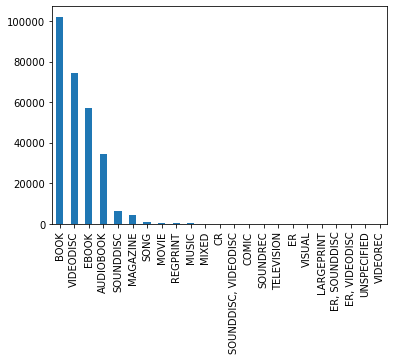

In [63]:
seattle_df['MaterialType'].value_counts().plot(kind='bar')

 We can specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter:
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots   
 

For example, to make a horizontal bar chart, we can set `kind='barh'`

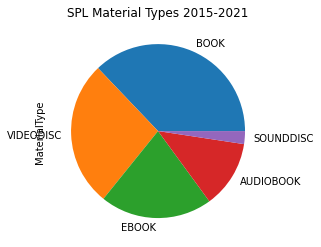

In [436]:
seattle_df['MaterialType'].value_counts()[:5].plot(title='SPL Material Types 2015-2021',
                                               kind='pie')

To save a plot as an image file or PDF file, we can assign the plot to a variable called `ax`, short for axes.

Then we can use `ax.figure.savefig('FILE-NAME.extension')`.

In [ ]:
ax = seattle_df['MaterialType'].value_counts().plot(kind='pie')
ax.figure.savefig('SPL-MaterialTypes.pdf')

## Reflection and Next Steps

What next steps should we take to analyze this data or better prepare it for analysis?